In [51]:
import missingno

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

TRAIN_SIZE = 0.7

# Основы машинного обучения
## Семинар 3. Классификация
### Данные

Источник: [kaggle](https://www.kaggle.com/datasets/prakashraushan/loan-dataset).

#### Посмотрим на данные в целом

In [2]:
class_df = pd.read_csv('loans.csv')
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [3]:
class_df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


Пропущенные значения

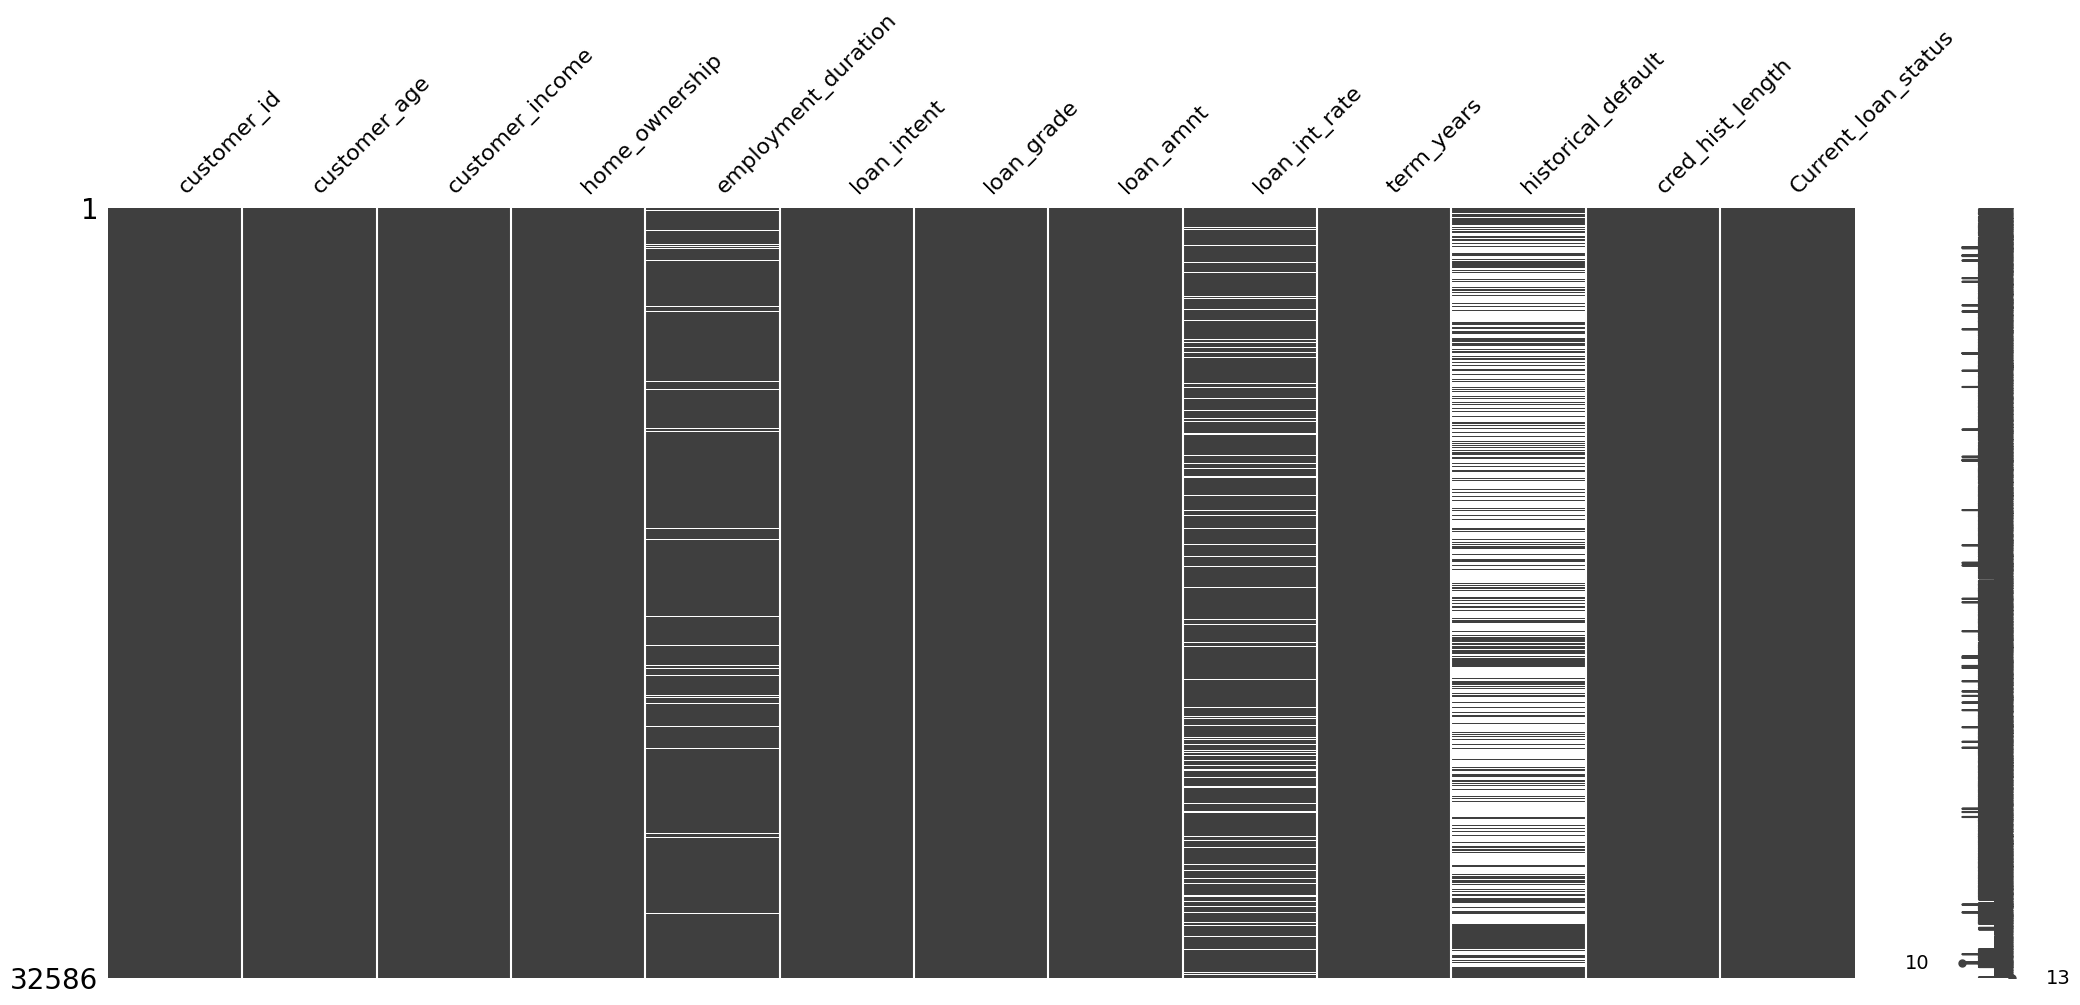

In [4]:
missingno.matrix(class_df);

In [5]:
class_df.isna().sum()

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64

In [6]:
# customer_id -> эта колонка нас не интересует
# employment_duration -> скорее всего, 0
# loan_amnt, loan_int_rate, Current_loan_status (target) -> критически важно, точно надо фильтровать
# historical_default -> скорее всего, NaN - не применимо (не брал заем ранее)

Дубликаты

In [7]:
class_df.duplicated().any()

True

In [8]:
columns_drop_na = ['loan_amnt', 'loan_int_rate', 'Current_loan_status']

# \ - переход на новую строку без разрыва (иначе будет SyntaxError)
class_data = class_df.dropna(subset=columns_drop_na)\
    .drop_duplicates(ignore_index=True)\
    .drop(columns=['customer_id'])

#### Посмотрим на переменные по отдельности

In [9]:
class_data.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


`customer_age`

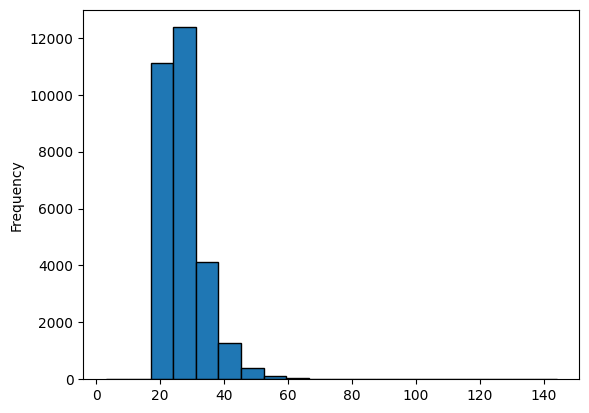

In [10]:
class_data['customer_age'].plot.hist(edgecolor='black', bins=20);

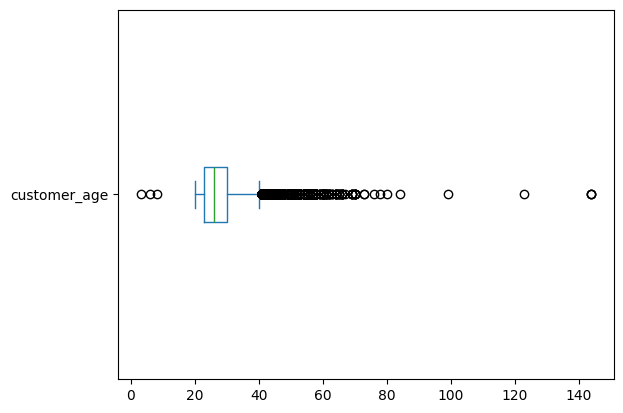

In [11]:
class_data['customer_age'].plot.box(vert=False);

In [12]:
customer_age_filter = (class_data['customer_age'].values >= 18) & (class_data['customer_age'].values < 100)

`customer_income`

In [13]:
class_data.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [14]:
# только запятые в середине (59,000 -> 59000) мешают преобразованию в float
class_data['customer_income'].str.replace(',', '.').astype(float)

0         59000.0
1          9600.0
2          9600.0
3         65500.0
4         54400.0
           ...   
29456     53000.0
29457    120000.0
29458     76000.0
29459    150000.0
29460     42000.0
Name: customer_income, Length: 29461, dtype: float64

In [15]:
class_data['customer_income'] = class_data['customer_income'].str.replace(',', '.').astype(float)

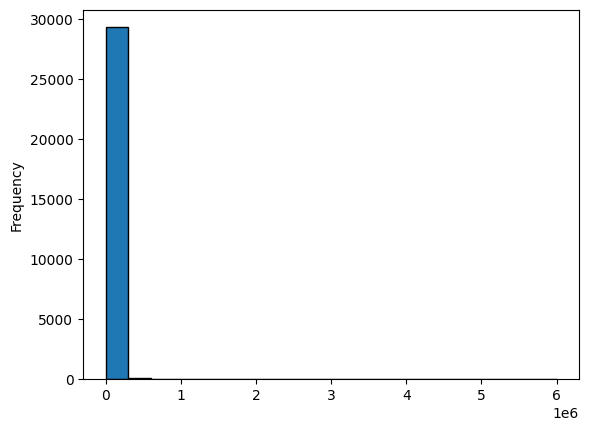

In [16]:
class_data['customer_income'].plot.hist(edgecolor='black', bins=20);

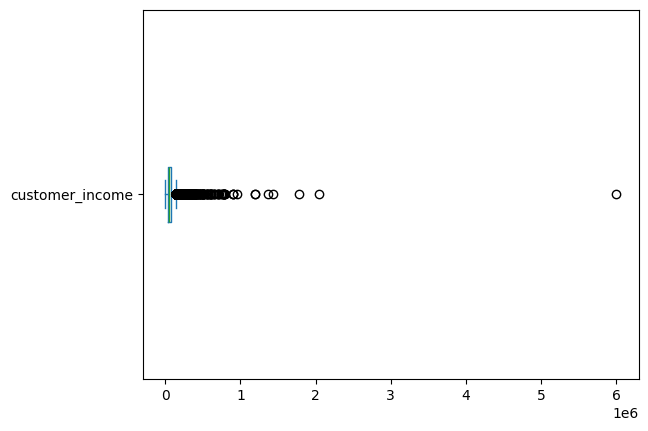

In [17]:
class_data['customer_income'].plot.box(vert=False);

In [18]:
class_data['customer_income_log'] = np.log(class_data['customer_income'].values)

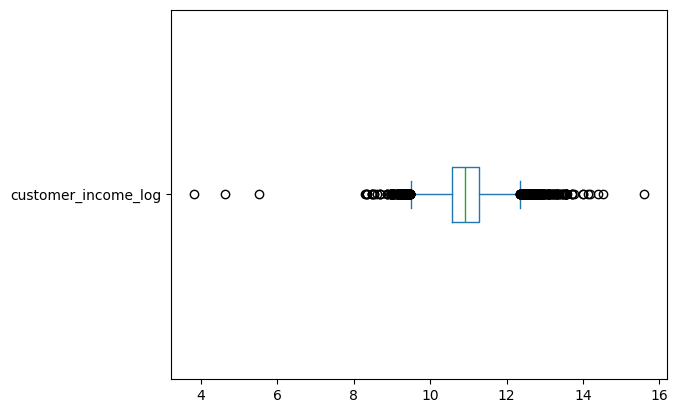

In [19]:
class_data['customer_income_log'].plot.box(vert=False);

In [20]:
customer_income_filter = class_data['customer_income_log'].values >= 7

`home_ownership`

In [21]:
class_data['home_ownership'].value_counts()  # OTHER слишком мало, следует отфильтровать

home_ownership
RENT        14891
MORTGAGE    12121
OWN          2355
OTHER          94
Name: count, dtype: int64

In [22]:
home_ownership_filter = class_data['home_ownership'].values != 'OTHER'

`employment_duration`

In [23]:
class_data.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,customer_income_log
0,22,59000.0,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT,10.985293
1,21,9600.0,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT,9.169518
2,25,9600.0,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT,9.169518
3,23,65500.0,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT,11.089805
4,24,54400.0,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT,10.904119


In [24]:
class_data['employment_duration'].isna().sum()

827

In [25]:
class_data['employment_duration'] = class_data['employment_duration'].fillna(0)

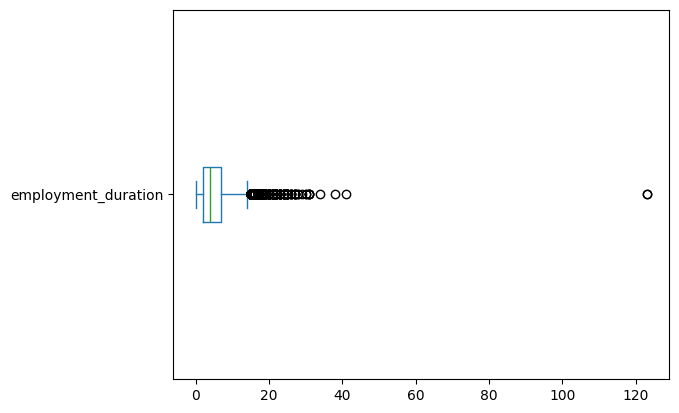

In [26]:
class_data['employment_duration'].plot.box(vert=False);  # кажется, попытались оформить кредит на уже умершего человека

In [27]:
employment_duration_filter = class_data['employment_duration'].values < 60

`loan_intent`

In [28]:
class_data['loan_intent'].value_counts()  # все хорошо

loan_intent
EDUCATION            5854
MEDICAL              5451
VENTURE              5151
PERSONAL             5012
DEBTCONSOLIDATION    4703
HOMEIMPROVEMENT      3290
Name: count, dtype: int64

`loan_grade`

In [29]:
class_data['loan_grade'].value_counts()  # все хорошо

loan_grade
A    14183
B     8130
C     4461
D     2414
E      273
Name: count, dtype: int64

`loan_amnt`

In [30]:
class_data.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,customer_income_log
0,22,59000.0,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT,10.985293
1,21,9600.0,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT,9.169518
2,25,9600.0,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT,9.169518
3,23,65500.0,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT,11.089805
4,24,54400.0,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT,10.904119


In [31]:
class_data['loan_amnt'] = class_data['loan_amnt'].str.strip('£').str.replace(',', '').astype(float)

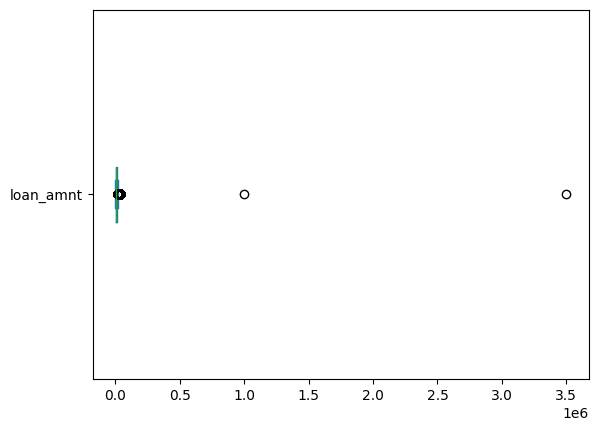

In [32]:
class_data['loan_amnt'].plot.box(vert=False);

In [33]:
class_data['loan_amnt_log'] = np.log(class_data['loan_amnt'].values)

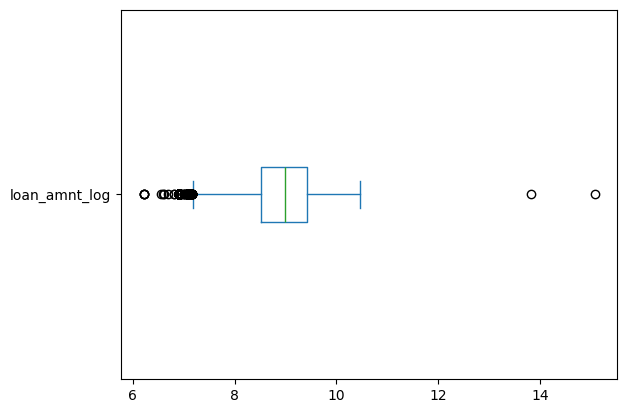

In [34]:
class_data['loan_amnt_log'].plot.box(vert=False);

In [35]:
loan_amnt_filter = class_data['loan_amnt_log'].values < 12

`loan_int_rate`

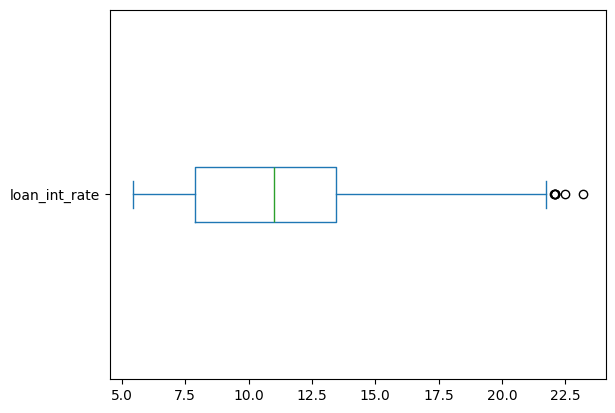

In [36]:
class_data['loan_int_rate'].plot.box(vert=False);  # все хорошо

`term_years`

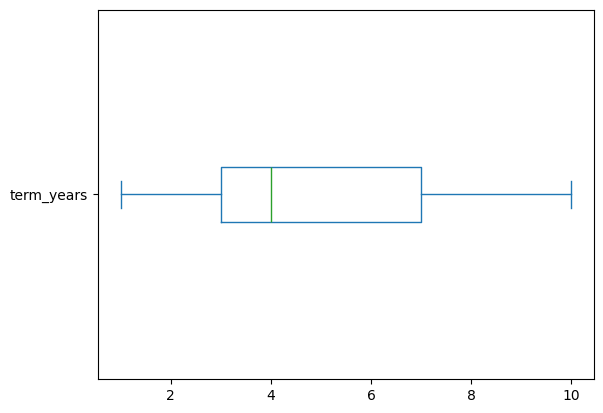

In [37]:
class_data['term_years'].plot.box(vert=False);  # все хорошо

`historical_default`

In [38]:
class_data['historical_default'].value_counts()

historical_default
Y    5561
N    5169
Name: count, dtype: int64

In [39]:
class_data['historical_default'] = class_data['historical_default'].fillna('NOT_APPLICABLE')

In [40]:
class_data['historical_default'].value_counts()

historical_default
NOT_APPLICABLE    18731
Y                  5561
N                  5169
Name: count, dtype: int64

`cred_hist_length`

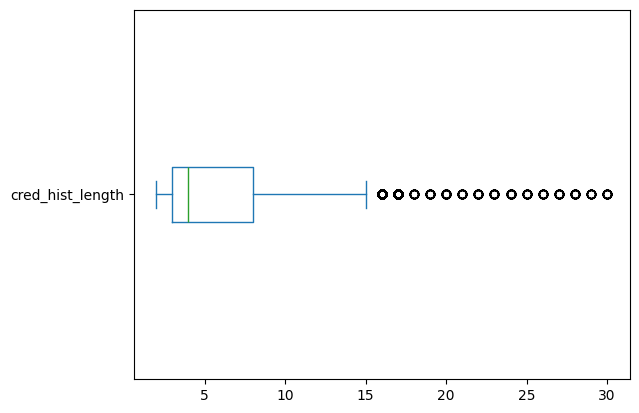

In [41]:
class_data['cred_hist_length'].plot.box(vert=False);  # выбросы как будто есть, но их много, фильтровать лично я бы не стал

`Current_loan_status`

In [42]:
class_data['Current_loan_status'].value_counts()

Current_loan_status
NO DEFAULT    23237
DEFAULT        6224
Name: count, dtype: int64

In [43]:
class_data['Current_loan_status'].value_counts(normalize=True)

Current_loan_status
NO DEFAULT    0.788738
DEFAULT       0.211262
Name: proportion, dtype: float64

In [44]:
class_data['target'] = 0
class_data.loc[class_data['Current_loan_status'] == 'DEFAULT', 'target'] = 1

### Подготовим данные к моделированию

In [45]:
class_data.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,customer_income_log,loan_amnt_log,target
0,22,59000.0,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,DEFAULT,10.985293,10.463103,1
1,21,9600.0,OWN,5.0,EDUCATION,A,1000.0,11.14,1,NOT_APPLICABLE,2,NO DEFAULT,9.169518,6.907755,0
2,25,9600.0,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT,9.169518,8.612503,1
3,23,65500.0,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,DEFAULT,11.089805,10.463103,1
4,24,54400.0,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,DEFAULT,10.904119,10.463103,1


In [46]:
variables = [
    'customer_age', 'customer_income_log', 'home_ownership', 'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt_log', 'loan_int_rate', 'term_years', 'historical_default',
    'cred_hist_length', 'target'
]

dummy_variables = ['home_ownership', 'loan_intent', 'loan_grade', 'historical_default']
target = 'target'

model_data = class_data.loc[
    customer_age_filter
    & customer_income_filter
    & home_ownership_filter
    & employment_duration_filter
    & loan_amnt_filter,
    variables
].reset_index(drop=True)

model_data = pd.get_dummies(
    model_data,
    columns=dummy_variables,
    dtype='int',
    drop_first=True
)

Уже знакомый нам подход: берем только нужные переменные, применяем фильтры и создаем дамми-фичи

In [47]:
model_data.head()

,customer_age,customer_income_log,employment_duration,loan_amnt_log,loan_int_rate,term_years,cred_hist_length,target,home_ownership_OWN,home_ownership_RENT,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,historical_default_NOT_APPLICABLE,historical_default_Y
0,21,9.169518,5.0,6.907755,11.14,1,2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,25,9.169518,1.0,8.612503,12.87,5,3,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,23,11.089805,4.0,10.463103,15.23,10,2,1,0,1,...,0,1,0,0,1,0,0,0,0,0
3,24,10.904119,8.0,10.463103,14.27,10,4,1,0,1,...,0,1,0,0,1,0,0,0,0,1
4,21,9.200290,2.0,7.824046,7.14,1,2,1,1,0,...,0,0,0,1,0,0,0,0,0,0


Разделим на train & test

In [48]:
from sklearn.model_selection import train_test_split

X = model_data.drop(columns=[target])
y = model_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE)

### Логистическая регрессия как продолжение линейной
1. Попробуйте использовать линейную регрессию для предсказания вероятности дефолта. Изучите предикт и измерьте качество (в качестве метрики используйте accuracy);
2. Адаптируйте выход линейной регрессии для задачи классификации, сравните результаты с результатами предыдущего пункта;
3. Сразу используйте логичестическую регрессию и сравните результаты с предыдущими подходами.

**Линейная регрессия**

In [54]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)
lr_predict_final = (lr_predict >= 0.5).astype(int)

In [53]:
lr_predict_final

array([0, 1, 0, ..., 0, 0, 0])

In [55]:
lr_predict

array([ 0.20453112,  0.5226577 ,  0.27094867, ...,  0.01049024,
       -0.01236694,  0.03126359])

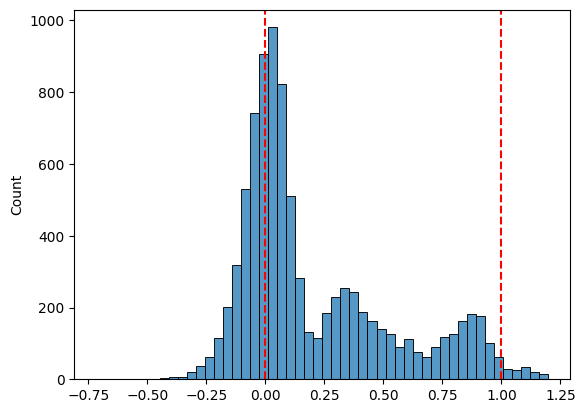

In [60]:
# обратите внимание, выход линейной регрессии при попытке предсказания значений 0 и 1 в принципе близок к этим границам, но не всегда умещается в них

fig, ax = plt.subplots()

sns.histplot(lr_predict, ax=ax)
ax.axvline(0, color='red', linestyle='dashed')
ax.axvline(1, color='red', linestyle='dashed');

In [62]:
# необходимо выбрать наиболее значимый признак. Как это сделать? Искать наибольшый по модулю коэффициент
lr.coef_

array([-7.59665256e-03, -8.65001088e-02, -3.28239221e-04,  3.65371664e-02,
       -3.75554325e-03,  1.41451759e-03, -9.74999286e-03, -5.47670736e-02,
        4.65886103e-02, -7.50852539e-02, -3.10343583e-02, -2.35462257e-02,
       -5.99598508e-02, -6.67126529e-02,  8.27878296e-03,  1.08806547e-01,
        2.97941398e-01,  3.36587115e-01, -7.45892176e-01, -4.81308743e-01])

In [63]:
coefficients = pd.DataFrame(
    {'variable': lr.feature_names_in_, 'coef': lr.coef_}
)

coefficients['coef_abs'] = np.abs(lr.coef_)

In [64]:
coefficients.sort_values(by='coef_abs', ascending=False)

,variable,coef,coef_abs
18,historical_default_NOT_APPLICABLE,-0.745892,0.745892
19,historical_default_Y,-0.481309,0.481309
17,loan_grade_E,0.336587,0.336587
16,loan_grade_D,0.297941,0.297941
15,loan_grade_C,0.108807,0.108807
1,customer_income_log,-0.086500,0.086500
9,loan_intent_EDUCATION,-0.075085,0.075085
13,loan_intent_VENTURE,-0.066713,0.066713
12,loan_intent_PERSONAL,-0.059960,0.059960
7,home_ownership_OWN,-0.054767,0.054767


**Адаптация выхода линейной регрессии:** линейная регрессия + sigmoid function

In [65]:
# e ^ (-x) -> np.exp(-x)
def sigmoid(x):
    f_x = 1 / (1 + np.exp(-x))

    return f_x

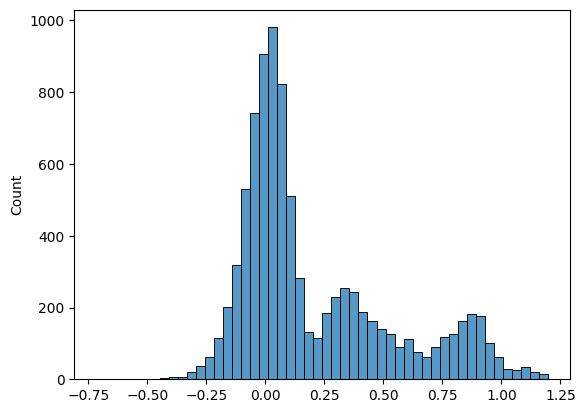

In [66]:
sns.histplot(lr_predict);

In [67]:
lr_sigmoid_predict = sigmoid(lr_predict)

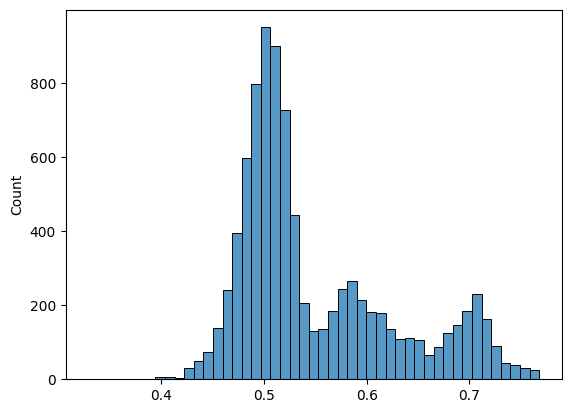

In [69]:
# теперь все значения находятся в промежутке от 0 до 1
sns.histplot(lr_sigmoid_predict);

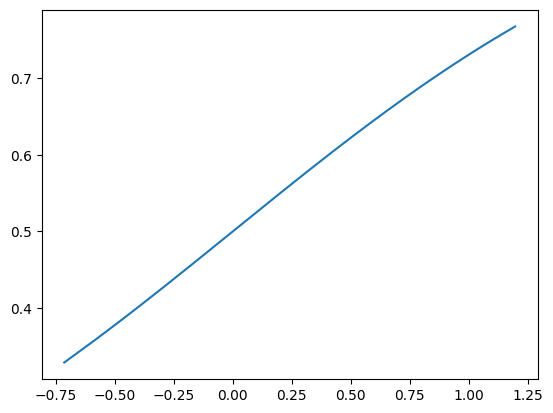

In [70]:
fig, ax = plt.subplots()

sns.lineplot(x=lr_predict, y=lr_sigmoid_predict);

In [71]:
lr_sigmoid_predict_final = (lr_sigmoid_predict >= 0.5).astype(int)  # финальный предикт

**Логистическая регрессия**

In [72]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg_predict_proba = logreg.predict_proba(X_test)[:, 1]  # сначала ВСЕГДА предсказывается вероятность -> далее надо выбрать порог
logreg_predict = logreg.predict(X_test)  # тут порог по дефолту 0.5

/Users/iadovgopolyi/teaching/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
((logreg_predict_proba >= 0.5).astype(int) == logreg_predict).all()

True

Проверим качество (воспользуемся accuracy):

In [74]:
pd.crosstab(lr_predict_final, y_test.values)  # по строкам - предсказание, по столбцам - истина

col_0,0,1
row_0,,
0,6685,476
1,255,1390


In [75]:
# обычная регрессия
(lr_predict_final == y_test.values).mean()  # accuracy

0.916988416988417

Не полагаемся на accuracy, считаем сначала baseline accuracy:

In [76]:
y_test.value_counts(normalize=True)

target
0    0.788099
1    0.211901
Name: proportion, dtype: float64

In [ ]:
# представим, что я сделал модель, которая всегда говорит 0. Какое accuracy она будет иметь?
# Ответ: будет равна доле класса 0 -> 0.79 (это и есть baseline accuracy)

In [77]:
# линейная регрессия + sigmoid
(lr_sigmoid_predict_final == y_test.values).mean()  # если accuracy хуже baseline - модель точно плохая

0.5122643652055416

In [78]:
# логистическая регрессия
(logreg_predict == y_test.values).mean()

0.9326595503066091

In [ ]:
# логистическая регрессия = линейная регрессия + sigmoid (на этапе оптимизации!)

### Confusion matrix и метрики качества

1. Перечислите основные метрики качества, которые вы прошли в модуле;
2. Как вы думаете, какая(ие) из них наиболее актуальна(ы) для задачи кредитного скоринга?
3. Попробуйте оценить, при каком cutoff (пороге) потенциальная прибыль максимальна.


На самом деле метрик качества классификации очень [много](https://neptune.ai/blog/evaluation-metrics-binary-classification). Всегда выбирайте ту, которая позволяет решить именно вашу задачу.

![](https://t1.daumcdn.net/thumb/R1280x0/?fname=http://t1.daumcdn.net/brunch/service/user/4SKt/image/VwzVj8EgnrXLgUcZcs_seAUWEQg.png)

In [79]:
pd.crosstab(logreg_predict, y_test.values)

col_0,0,1
row_0,,
0,6696,349
1,244,1517


In [80]:
print(classification_report(logreg_predict, y_test.values))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7045
           1       0.81      0.86      0.84      1761

    accuracy                           0.93      8806
   macro avg       0.89      0.91      0.90      8806
weighted avg       0.93      0.93      0.93      8806



In [81]:
# ROC-AUC - наиболее сбалансированная метрика
# baseline - 0.5 (50 / 50)
roc_auc_score(y_test.values, logreg_predict_proba)  # обязательно вставляется предсказанная вероятность, НЕ 0 и 1

0.9806554265469452

### Дерево решений и ансамбли

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [86]:
dt = DecisionTreeClassifier(
    criterion='log_loss',
    max_depth=6, # не будем делать дерево слишком глубоким, т. к. логистическая регрессия справляется неплохо, а это простая модель - значит, классы разделяются довольно "линейно"
)
dt.fit(X_train, y_train)

dt_predict_proba = dt.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, dt_predict_proba)  # roc-auc отличный

0.983323642243576

In [87]:
rf = RandomForestClassifier(
    criterion='log_loss',
    max_depth=6,
)
rf.fit(X_train, y_train)

rf_predict_proba = rf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test.values, rf_predict_proba)  # случайный лес - наилучшая модель

0.988217719790827

### [CatBoost](https://catboost.ai/)

In [ ]:
# !pip install catboost

In [88]:
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier(
    iterations=2,
    depth=2,
    learning_rate=1,
    loss_function='Logloss',
    verbose=True
)

model.fit(X_train, y_train)

cb_predict_proba = model.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, cb_predict_proba)  # это бустинг, возможно он чуть переучился

0:	learn: 0.2109659	total: 63.5ms	remaining: 63.5ms
1:	learn: 0.1804745	total: 69ms	remaining: 0us


0.9623596143332376